In [1]:
#Packages
import numpy as np
import numpy.random as nr
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pylab import plot, show
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as sklm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced



from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
bank_additional_full=pd.read_csv('bank-additional-full.csv',sep=';')
data =pd.read_csv('bank-additional-full.csv',sep=';')


In [3]:
bank_additional_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
print(bank_additional_full.shape)

(41188, 21)


In [5]:
bank_additional_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
pd.set_option("max_columns", None)
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Visualizing the Data

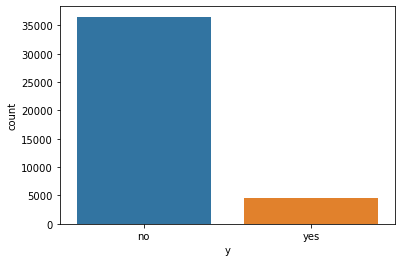

In [9]:
sns.countplot(x='y', data=bank_additional_full)

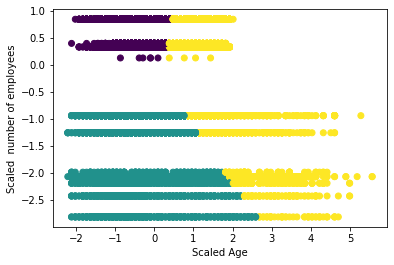

In [10]:
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt

additional_bank = bank_additional_full[['age','nr.employed']].values
additional_bank_scaled = preprocessing.scale(additional_bank)


kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(additional_bank_scaled)
y_pred = kmeans.predict(additional_bank_scaled)

plt.scatter(additional_bank_scaled[:, 0], additional_bank_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled  number of employees')
plt.show()

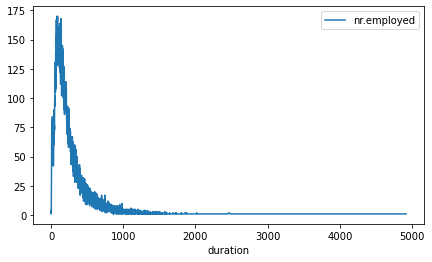

In [11]:
fig, ax = plt.subplots(figsize=(7,4))
bank_additional_full.groupby(['duration']).count()[['nr.employed']].plot(ax=ax)

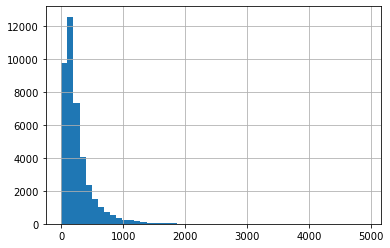

In [12]:
bank_additional_full['duration'].hist(bins=50)

# Feature Engineering

In [13]:
y ={'yes' : 1, 'no' : 0}
bank_additional_full['y_cat'] = bank_additional_full['y'].map(lambda x: y[x])
bank_additional_full['y_cat'].value_counts()

0    36548
1     4640
Name: y_cat, dtype: int64

In [14]:
age_group_names = ['young', 'lower middle', 'middle', 'senior']
bank_additional_full['Age_Group'] = pd.qcut(bank_additional_full['age'], 4, labels = age_group_names)
bank_additional_full['Age_Group'].value_counts()
bank_additional_full['y_cat'].groupby([bank_additional_full['marital'],bank_additional_full['Age_Group']]).mean().round(3)

marital   Age_Group   
divorced  young           0.074
          lower middle    0.094
          middle          0.082
          senior          0.134
married   young           0.098
          lower middle    0.092
          middle          0.076
          senior          0.136
single    young           0.166
          lower middle    0.117
          middle          0.088
          senior          0.109
unknown   young           0.250
          lower middle    0.042
          middle          0.333
          senior          0.115
Name: y_cat, dtype: float64

In [15]:
bank_additional_full['life_stage'] = bank_additional_full.apply(lambda x: x['Age_Group'] +' & ' + x['marital'], axis = 1)
bank_additional_full['life_stage'].value_counts()

senior & married           7478
middle & married           7111
young & single             6418
lower middle & married     6104
young & married            4235
lower middle & single      2942
senior & divorced          1745
middle & single            1584
middle & divorced          1439
lower middle & divorced     929
senior & single             624
young & divorced            499
senior & unknown             26
lower middle & unknown       24
young & unknown              24
middle & unknown              6
Name: life_stage, dtype: int64

In [16]:
bank_additional_full.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)
bank_additional_full.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_cat,Age_Group,life_stage
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,senior,senior & married
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,senior,senior & married
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,lower middle,lower middle & married
3,40,admin.,married,basic,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,middle,middle & married
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,senior,senior & married


# Machine Learning Models

In [17]:
cat_columns = ['job','marital','education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome','euribor3m','Age_Group','life_stage']
num_columns = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.conf.idx','cons.price.idx', 'euribor3m','nr.employed']


In [18]:
for col in bank_additional_full.columns:
    if bank_additional_full[col].dtype==object:
           bank_additional_full[col]=bank_additional_full[col].astype('category')
           bank_additional_full[col]=bank_additional_full[col].cat.codes

In [19]:
cat_cols = []

In [20]:
ohe = OneHotEncoder()
df_cat = bank_additional_full[cat_columns]
encoded = ohe.fit_transform(df_cat)
ohe_df = pd.DataFrame(encoded.todense(), columns=ohe.get_feature_names())

In [21]:
df_num = bank_additional_full[num_columns].reset_index(drop=True)

In [22]:
y = bank_additional_full['y_cat']

In [23]:
X = pd.concat([df_num, ohe_df], axis = 1)
y = y

In [24]:
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)


In [25]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
import warnings
warnings.filterwarnings("ignore")

### Classify the model using DecisionTreeClassifier

[[7018  315]
 [ 376  529]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7333
           1       0.63      0.58      0.60       905

    accuracy                           0.92      8238
   macro avg       0.79      0.77      0.78      8238
weighted avg       0.91      0.92      0.91      8238



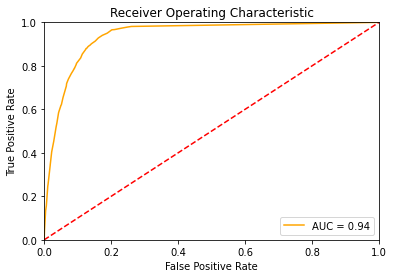

In [26]:
clf = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500)
model_clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_test =clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [27]:
test_acc = model_clf.score(X_test,y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.916


### Classify the model using DecisionTreeClassifier with GridSearchCV

Best Hyperparameters:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}
[[6930  403]
 [ 344  561]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7333
           1       0.58      0.62      0.60       905

    accuracy                           0.91      8238
   macro avg       0.77      0.78      0.77      8238
weighted avg       0.91      0.91      0.91      8238



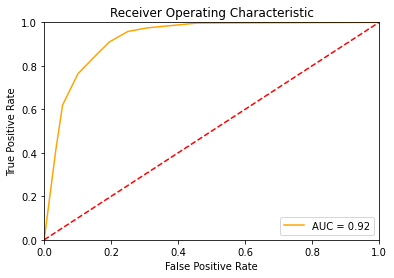

In [29]:
SEED = 1
dt = DecisionTreeClassifier(random_state=SEED)
params_dt = {
             'max_depth':[3, 4, 5, 6],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4, 0.6, 0.8]
            }
grid_dt = GridSearchCV(estimator = dt, param_grid=params_dt,scoring='roc_auc', cv=10, n_jobs=-1)
model_grid_dt = grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print('Best Hyperparameters:\n', best_hyperparams)

y_pred = grid_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_test =grid_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [30]:
test_acc = model_grid_dt.score(X_test,y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.925


### Classify the model using RandomForestClassifier

[[7149  184]
 [ 566  339]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7333
           1       0.65      0.37      0.47       905

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238



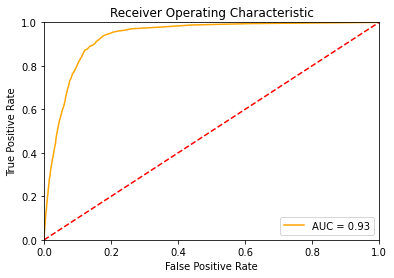

In [29]:
#rf = RandomForestClassifier(random_state = 42) 

#dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators}
rf = RandomForestClassifier()
model_rf = GridSearchCV(rf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)

model_rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_test =rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
test_acc = model_rf.score(X_test,y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.910


### Classify the model using KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': np.arange(1,10)}
#param_grid = {'n_neighbors'}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
model_knn = knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_test =knn_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[7204  129]
 [ 725  180]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7333
           1       0.58      0.20      0.30       905

    accuracy                           0.90      8238
   macro avg       0.75      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238



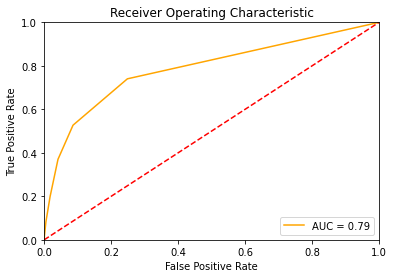

In [53]:
knn = KNeighborsClassifier(n_neighbors = 6)
model_knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_test =knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
test_acc = model_knn.score(X_test,y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.896


                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.35      0.97      0.52      0.58      0.32      7333
          1       0.16      0.97      0.35      0.27      0.58      0.36       905

avg / total       0.90      0.42      0.90      0.49      0.58      0.32      8238

[[2555 4778]
 [  28  877]]


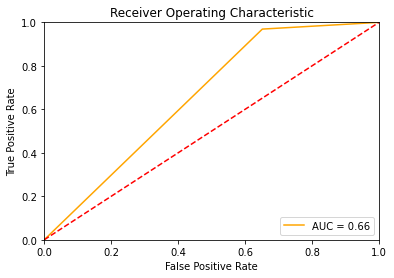

In [86]:
RANDOM_STATE = 42
test_size = 0.2

#Create a pipeline
LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True))
svm.SVC(probability=True)

pipeline = make_pipeline(NearMiss(version=2),
                         LinearSVC(random_state=RANDOM_STATE))
model_imb = pipeline.fit(X_train, y_train)

pred_test_imb = pipeline.predict(X_test)

# Classify and report the results
print(classification_report_imbalanced(y_test, pred_test_imb))

print(confusion_matrix(y_test, pred_test_imb))
#print(classification_report(y_test, y_pred))
      
#pipe_test =pipeline.predict(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test_imb)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
test_acc = model_imb.score(X_test,y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.417


### imblearn.over_sampling.RandomOverSampler

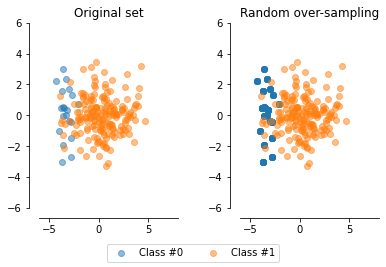

In [164]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

### Oversample the minority cases

[[6865  468]
 [ 392  513]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7333
           1       0.52      0.57      0.54       905

    accuracy                           0.90      8238
   macro avg       0.73      0.75      0.74      8238
weighted avg       0.90      0.90      0.90      8238



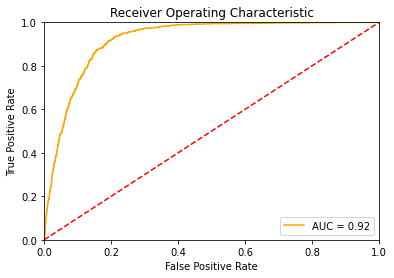

In [160]:
y_temp = y_train[y_train == 1] 
X_temp = X_train[y_train == 1,:]
X_train = np.concatenate((X_train, X_temp), axis = 0)
y_train = np.concatenate((y_train, y_temp), axis = 0) 

nr.seed(1115)

nn_mod = MLPClassifier(hidden_layer_sizes = (100,100),
                       max_iter=300)
nn_mod.fit(X_train, y_train)
y_pred1 = nn_mod.predict(X_test)

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

pred_test1 =nn_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test1)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
for col in data.columns:
    if data[col].dtype==object:
           data[col]=datal[col].astype('category')
           data[col]=data[col].cat.codes
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]

In [34]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print(classification_report(y_test, y_pred))


pred_test2 =logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklm.roc_curve(y_test, pred_test2)
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

TypeError: list indices must be integers or slices, not str

### Various Classification models Algorithm Comparison

In [128]:
features_columns=['job','education', 'default', 'housing', 'loan',
           'month', 'day_of_week', 'duration', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','y','Age_Group', 'life_stage']
features_columns_df=bank_additional_full[features_columns]

 LR : 0.905961 (0.083231)
 LDA : 0.836778 (0.209299)
 KNN : 0.898410 (0.088158)
 CLF : 0.876995 (0.107383)
 RF : 0.892120 (0.109453)
 NB : 0.871679 (0.111995)


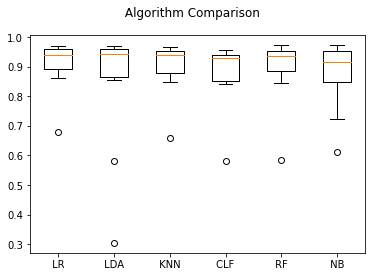

In [27]:
#X = features_columns_df.iloc[:,0:15]
#Y = features_columns_df.iloc[:,15]
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CLF ' , DecisionTreeClassifier()))
models.append(( ' RF ' , RandomForestClassifier()))
models.append(( ' NB ' , GaussianNB()))
#models.append(( ' SVM ' , SVC()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Making Prediction using Best Model Algorithm - RandomForestClassifier

In [30]:
def score_model(probs, threshold):
    return np.array([0 if x > threshold else 1 for x in probs[:,1]])
threshold = 0.51
probabilities = model_rf.predict_proba(X_test)
scores = score_model(probabilities, threshold)

In [31]:
pd.set_option("max_columns", None)
print(scores)

[1 1 1 ... 1 1 1]


In [32]:
np.savetxt('final_answers_5.csv', scores, delimiter=',',fmt='%i')

## Summary:

1. Loaded the data using pandas and worked with some Exploratory Data Analysis (EDA) techniques

2. After applying the EDA some feature engineering techniques applied

3. Used AUC as metric because this is higly imbalanced dataset

4. Seggregated Categorical Columns and Numerical Columns 

5. Applied OneHotEncoder to encode the all catagorical features 

6. Created Nmerical Column data frame

7. Splited the whole data as train,test and cv using model_selection.train_test_split 

8. Applied Machine Learning algorithms such as DecisionTreeClassifier,DecisionTreeClassifier with GridSearchCV, 
   RandomForestClassifier, and KNeighborsClassifier

9. Created a Box Plot of Comparison of Various Classification models Algorithms  

10. Random Forest gives best result AUC = 0.75 with Accuracy = 0.89

11.  Created a CSV file for Prediction using Best Model Algorithm - RandomForestClassifier
